<a href="https://colab.research.google.com/github/prynshus/Machine-learning-/blob/main/MachinLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT 1 Sonar dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
import pickle

In [ ]:
def data_investigation(data, column=None, column_name=None):
    print("Shape of data: {}".format(data.shape))
    print(data.describe())
    print("_________________________________")
    if(column):
      print(data[column_name].value_counts())
      print("_________________________________")
    print("No. if missing values:")
    print(data.isnull().sum())

In [ ]:
def shape(*args, List=False):
    for x in args:
        if List:
           print(len(x))
        else:
           print(x.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Datasets/Copy of sonar data.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
data.shape

(208, 61)

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [ ]:
X = data.drop(columns=60, axis=1)
y = data[60]
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(187, 60)
(187,)
(21, 60)
(21,)


In [ ]:
model1 = LogisticRegression()
model2 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

LogisticRegression()

In [ ]:

y_train_pred=model1.predict(X_train)
print("Model training accuracy: {}%".format(accuracy_score(y_train_pred, y_train)*100))

y_pred=model1.predict(X_test)
print("Model evaluation accuracy: {}%".format(accuracy_score(y_pred, y_test)*100))

Model training accuracy: 82.35294117647058%
Model evaluation accuracy: 85.71428571428571%


In [ ]:
def Sonar_prediction(x):
    return model1.predict(x)


data[60] == Sonar_prediction(X)

0       True
1       True
2      False
3      False
4      False
       ...  
203     True
204     True
205     True
206     True
207     True
Name: 60, Length: 208, dtype: bool

PROJECT 2 Diabetes dataset

In [ ]:
data_1 = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")
data_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data_investigation(data_1, column=True, column_name="Outcome")

Shape of data: (768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.

In [ ]:
X = data_1.drop(columns="Outcome", axis=1)
y = data_1["Outcome"]

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

shape(X_train,X_test,y_train,y_test)

(614, 8)
(154, 8)
(614,)
(154,)


In [ ]:
from sklearn import svm

In [ ]:
classifier = svm.SVC(kernel="linear")
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:

y_train_pred=classifier.predict(X_train)
print("Model training accuracy: {}%".format(accuracy_score(y_train_pred, y_train)*100))

y_pred=classifier.predict(X_test)
print("Model evaluation accuracy: {}%".format(accuracy_score(y_pred, y_test)*100))

Model training accuracy: 77.36156351791531%
Model evaluation accuracy: 75.32467532467533%


In [ ]:
classifier.predict(X_train)==y_train

60      True
618    False
346     True
294    False
231     True
       ...  
71      True
106     True
270     True
435     True
102     True
Name: Outcome, Length: 614, dtype: bool

In [ ]:
def diabetes_classifier(x):
    reshaped=np.asarray(x).reshape(1,-1)
    scaled=scaler.fit_transform(reshaped)
    pred=classifier.predict(scaled)
    return pred

In [ ]:
x= 6,148,72,35,0,33.6,0.627,50
diabetes_classifier(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
filename= "diabetes_model.sav"
pickle.dump(classifier, open(filename,'wb'))

PROJECT 3
Housing dataset of Boston

In [ ]:
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data=raw_df.dropna(subset=[10])
X=data.drop(columns=10,axis=1)
y=data[10]

In [ ]:
data_investigation(pd.DataFrame(data))

Shape of data: (506, 11)
               0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10  
count  506.000000  506.000000  506.000000  506.000000  506.000000  
mean    68.574901    3.795043    9.549407  408.237154   18.455534  
std     28.148861    2.105710    8.707259

In [ ]:
def data_visualisation(data, size = 10):
    correlation=data.corr()
    plt.figure(figsize=(size,size))
    sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Blues")

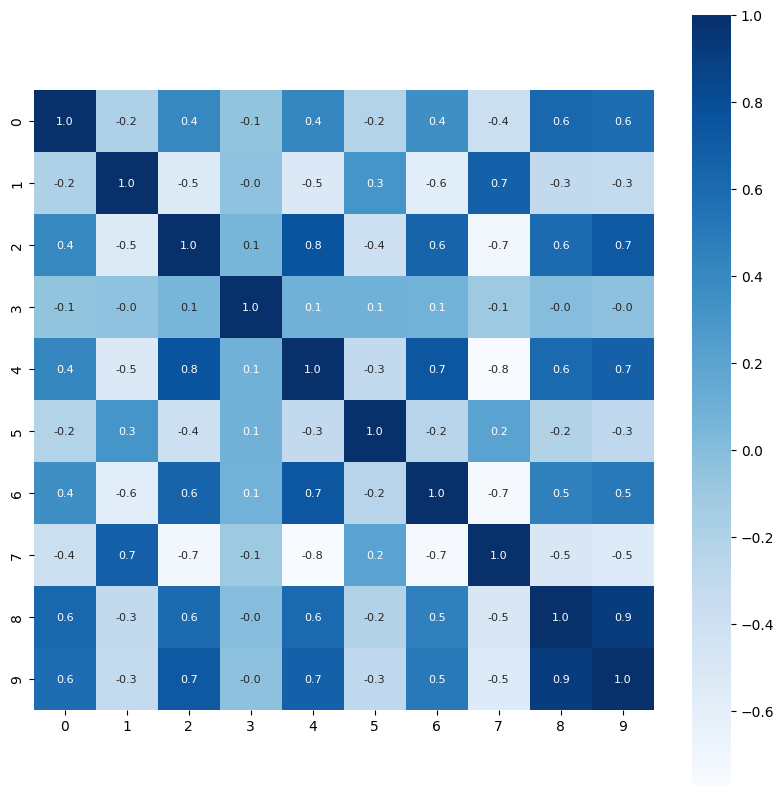

In [ ]:
data_visualisation(X)

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

shape(X_train,X_test,y_train,y_test)

(404, 10)
(102, 10)
(404,)
(102,)


In [ ]:
xgmodel=XGBRegressor()
xgmodel.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn import metrics

In [ ]:

y_train_pred=xgmodel.predict(X_train)

r2_error = metrics.r2_score(y_train_pred, y_train)
abserror = metrics.mean_absolute_error(y_train_pred, y_train)
print("r2 error: {:.5f}".format(r2_error))
print("Absolute error: {:.5f}".format(abserror))

r2 error: 1.00000
Absolute error: 0.00087


In [ ]:
y_test_pred=xgmodel.predict(X_test)

r2_error = metrics.r2_score(y_test_pred, y_test)
abserror = metrics.mean_absolute_error(y_test_pred, y_test)
print("r2 error: {:.5f}".format(r2_error))
print("Absolute error: {:.5f}".format(abserror))

r2 error: 0.90657
Absolute error: 0.20009


PROJECT 4 Fake News Detection

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words("english"))
shape(pd.DataFrame(stopwords.words("english")))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
raw_news_data = pd.read_csv("/content/drive/MyDrive/Datasets/train.csv")
raw_news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data_investigation(raw_news_data)

Shape of data: (20800, 5)
                 id         label
count  20800.000000  20800.000000
mean   10399.500000      0.500625
std     6004.587135      0.500012
min        0.000000      0.000000
25%     5199.750000      0.000000
50%    10399.500000      1.000000
75%    15599.250000      1.000000
max    20799.000000      1.000000
_________________________________
No. if missing values:
id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [ ]:
raw_news_data = raw_news_data.fillna("")
data_investigation(raw_news_data)

Shape of data: (20800, 5)
                 id         label
count  20800.000000  20800.000000
mean   10399.500000      0.500625
std     6004.587135      0.500012
min        0.000000      0.000000
25%     5199.750000      0.000000
50%    10399.500000      1.000000
75%    15599.250000      1.000000
max    20799.000000      1.000000
_________________________________
No. if missing values:
id        0
title     0
author    0
text      0
label     0
dtype: int64


In [ ]:
raw_news_data["content"] = raw_news_data["author"] + " " + raw_news_data["title"]

In [ ]:
raw_news_data["content"].head()

0    Darrell Lucus House Dem Aide: We Didn’t Even S...
1    Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2    Consortiumnews.com Why the Truth Might Get You...
3    Jessica Purkiss 15 Civilians Killed In Single ...
4    Howard Portnoy Iranian woman jailed for fictio...
Name: content, dtype: object

In [ ]:
#Port stem gets the root word of the word
#for example actor, actress, acting -> act
port_stem = PorterStemmer()

In [ ]:
def preprocessing(content):
    streamed_content = re.sub("[^a-zA-Z]", " ", content)
    streamed_content = streamed_content.lower()
    streamed_content = streamed_content.split()
    streamed_content = [port_stem.stem(word) for word in streamed_content if not word in stopwords.words("english")]
    streamed_content = " ".join(streamed_content)
    return streamed_content

In [ ]:
X = raw_news_data["content"].values
y = raw_news_data["label"].values

In [ ]:
X[:5]

array(['Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It',
       'Daniel J. Flynn FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart',
       'Consortiumnews.com Why the Truth Might Get You Fired',
       'Jessica Purkiss 15 Civilians Killed In Single US Airstrike Have Been Identified',
       'Howard Portnoy Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery'],
      dtype=object)

In [ ]:
raw_news_data["content"].apply(preprocessing)

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [ ]:

#Tfidf computes the frequency of a word if it's larger then it removes it.
#It convert string to numbes

vectorizer = TfidfVectorizer()
vectorizer.fit(raw_news_data["content"])
X_processed = vectorizer.transform(raw_news_data["content"])
print(X_processed)

  (0, 23355)	0.18006497451107856
  (0, 22649)	0.26575278886038384
  (0, 22289)	0.3484071341454308
  (0, 19171)	0.22537992364975484
  (0, 12902)	0.3024224900242886
  (0, 12528)	0.24883399099107747
  (0, 11409)	0.20615188166061463
  (0, 11307)	0.1532265401605094
  (0, 10387)	0.1844880289323935
  (0, 7574)	0.23047267305353566
  (0, 6145)	0.24677171892553343
  (0, 5800)	0.2502787762405247
  (0, 5508)	0.2993429551929777
  (0, 4507)	0.20531415441295317
  (0, 3862)	0.30579573877221844
  (0, 904)	0.26354004814013343
  (1, 23748)	0.2966210296019264
  (1, 15149)	0.15862263711495958
  (1, 10134)	0.18787145765749733
  (1, 8420)	0.7045992054867243
  (1, 5469)	0.2624012615566619
  (1, 4298)	0.19024289659874757
  (1, 3509)	0.37751839443307017
  (1, 3075)	0.15310531118537438
  (1, 2544)	0.2899843833664323
  :	:
  (20797, 11262)	0.12516633187998083
  (20797, 10427)	0.20792477683235197
  (20797, 5559)	0.20389975589596085
  (20797, 3394)	0.14456424605079038
  (20797, 2273)	0.31989436828531154
  (20797, 1

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
news_model = LogisticRegression()
news_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_train_pred=news_model.predict(X_train)
print("Model training accuracy: {}%".format(accuracy_score(y_train_pred, y_train)*100))

y_pred=news_model.predict(X_test)
print("Model evaluation accuracy: {}%".format(accuracy_score(y_pred, y_test)*100))

Model training accuracy: 98.68389423076923%
Model evaluation accuracy: 97.1875%


In [ ]:
y_pred=news_model.predict(X_processed[1])
if y_pred == 0:
   print("The news is real")
else:
   print("The news is fake")

The news is real


PROJECT 5 Loan status

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Datasets/train_u6lujuX_CVtuZ9i (1).csv")

In [ ]:
raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data_investigation(raw_data, column=True, column_name="Loan_Status")

Shape of data: (614, 13)
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
_________________________________
Loan_Status
Y    422
N    192
Name: count, dtype:

In [ ]:
raw_data = raw_data.dropna()
data_investigation(raw_data)

Shape of data: (480, 13)
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min         150.000000           0.000000    9.000000         36.000000   
25%        2898.750000           0.000000  100.000000        360.000000   
50%        3859.000000        1084.500000  128.000000        360.000000   
75%        5852.500000        2253.250000  170.000000        360.000000   
max       81000.000000       33837.000000  600.000000        480.000000   

       Credit_History  
count      480.000000  
mean         0.854167  
std          0.353307  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
_________________________________
No. if missing values:
Loan_ID              0
Gen

In [ ]:
raw_data["Loan_Status"].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [ ]:
raw_data["Property_Area"].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [ ]:
raw_data["Self_Employed"].value_counts()

Self_Employed
No     414
Yes     66
Name: count, dtype: int64

In [ ]:
raw_data["Education"].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [ ]:
raw_data["Married"].value_counts()

Married
Yes    311
No     169
Name: count, dtype: int64

In [ ]:
raw_data["Gender"].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [ ]:
raw_data["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

<Axes: xlabel='Married', ylabel='count'>

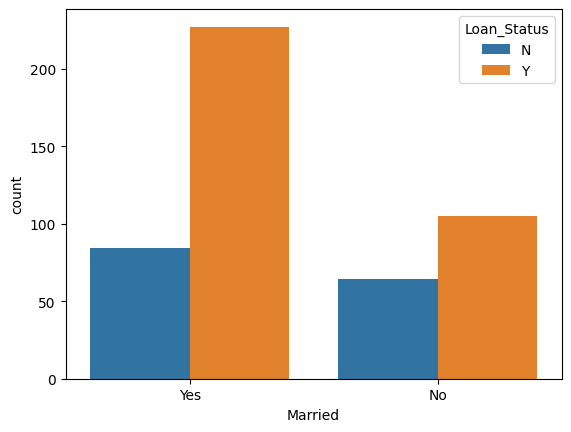

In [ ]:
sns.countplot(x="Married", hue="Loan_Status", data =raw_data)

<Axes: xlabel='Education', ylabel='count'>

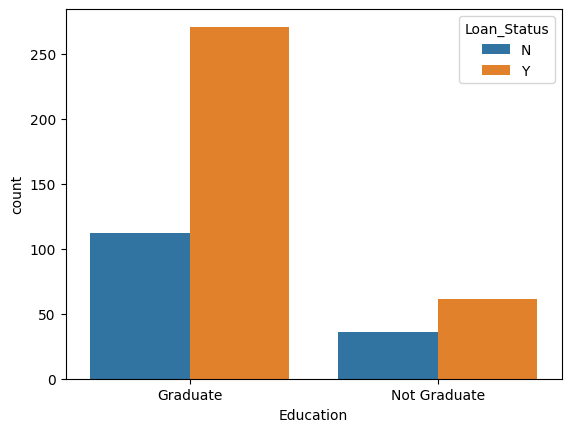

In [ ]:
sns.countplot(x="Education", hue="Loan_Status", data =raw_data)

In [ ]:
raw_data.replace({"Dependents" : {"3+" : 3}, "Loan_Status": {"Y" : 1, "N" : 0}, "Married" : {"Yes" : 1, "No" : 0}, "Education" : {"Graduate" : 1, "Not Graduate" : 0}, "Self_Employed" :  {"Yes" : 1, "No" : 0}, "Property_Area" : {"Rural" : 0, "Semiurban" : 1, "Urban" : 2}, "Gender" : {"Male" : 0, "Female" : 1}}, inplace=True)

In [ ]:
raw_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
X = raw_data.drop(columns=["Loan_ID", "Loan_Status"], axis=1)
y = raw_data["Loan_Status"]
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
shape(X_train, X_test,y_train, y_test)

(432, 11)
(48, 11)
(432,)
(48,)


In [ ]:
loan_model = svm.SVC(kernel="linear")

In [ ]:
loan_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
def model_result(model, X_train, y_train, X_test, y_test, classify = True):
    if classify:
       y_train_pred=model.predict(X_train)
       print("{} training accuracy: {}%".format(model, accuracy_score(y_train_pred, y_train)*100))

       y_pred=model.predict(X_test)
       print("{} evaluation accuracy: {}%".format(model, accuracy_score(y_pred, y_test)*100))

    else:
       y_train_pred=model.predict(X_train)
       r2_error = metrics.r2_score(y_train_pred, y_train)
       abserror = metrics.mean_absolute_error(y_train_pred, y_train)
       print("{} training evaluation:".format(model))
       print("r2 error: {:.5f}".format(r2_error))
       print("Absolute error: {:.5f}".format(abserror))
       print("___________________________")
       y_test_pred=model.predict(X_test)
       r2_error = metrics.r2_score(y_test_pred, y_test)
       abserror = metrics.mean_absolute_error(y_test_pred, y_test)
       print("{} testing evaluation:".format(model))
       print("r2 error: {:.5f}".format(r2_error))
       print("Absolute error: {:.5f}".format(abserror))

In [ ]:
model_result(loan_model, X_train, y_train, X_test, y_test)

SVC(kernel='linear') training accuracy: 81.01851851851852%
SVC(kernel='linear') evaluation accuracy: 75.0%


PROJECT 6 Wine quality prediction

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Datasets/winequality-red.csv")
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data_investigation(raw_data, column = True, column_name = "quality")

Shape of data: (1599, 12)
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000    

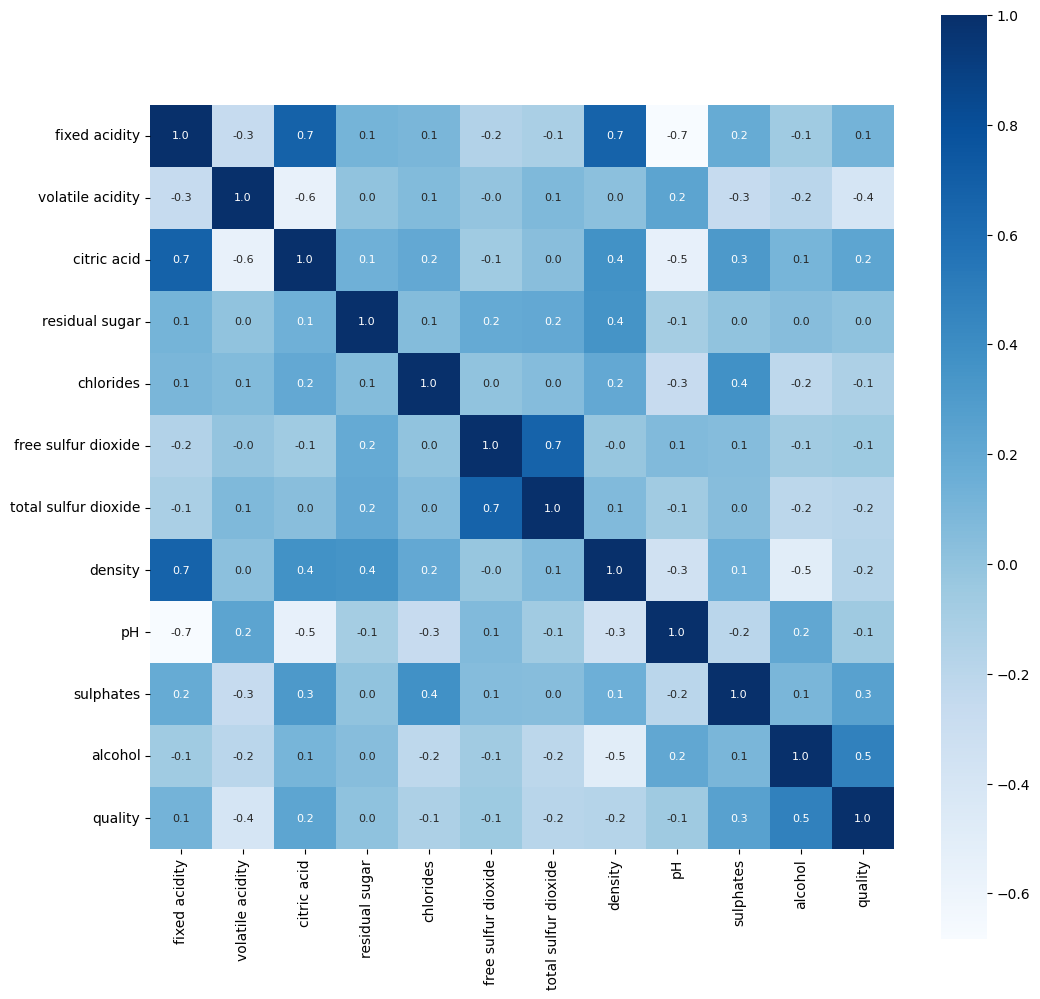

In [ ]:
data_visualisation(raw_data, size = 12)

In [ ]:
X = raw_data.drop(columns = "quality", axis = 1)
#Binarization: converting labels to binary
y = raw_data["quality"].apply(lambda x: 1 if x >= 7 else 0)

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
shape(X_train, X_test,y_train, y_test)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
wine_model = RFC()
wine_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model_result(wine_model, X_train, y_train, X_test, y_test)

RandomForestClassifier() training accuracy: 100.0%
RandomForestClassifier() evaluation accuracy: 93.75%


In [ ]:
def wine_quality_prediction(X):
    X = np.asarray(X).reshape(1,-1)
    p = wine_model.predict(X)
    if p == 0:
      print("Bad quality wine")
    else:
      print("Good quality wine")

In [ ]:
X = 8.9, 0.62, 0.19, 3.9, 0.17, 51, 148, 0.9986, 3.17, 0.93, 9.2
wine_quality_prediction(X)

Bad quality wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


PROJECT 7 Car price prediction

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Datasets/car data.csv")
raw_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data_investigation(raw_data)

Shape of data: (301, 9)
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000
_________________________________
No. if missing values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [ ]:
raw_data.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [ ]:
raw_data.Selling_type.value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [ ]:
raw_data.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [ ]:
raw_data.replace({"Transmission" : {"Manual" : 0, "Automatic" : 1}, "Selling_type" : {"Dealer" : 0, "Individual" : 1}, "Fuel_Type" : {"Petrol" : 0, "Diesel" : 1, "CNG" : 2}}, inplace=True)
raw_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = raw_data.drop(columns= ["Car_Name", "Selling_Price"], axis = 1)
y = raw_data["Selling_Price"]

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
shape(X_train, X_test,y_train, y_test)

(270, 7)
(31, 7)
(270,)
(31,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [ ]:
car_model1 = LinearRegression()
car_model2 = Lasso()

In [ ]:
car_model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
car_model2.fit(X_train, y_train)

Lasso()

In [ ]:
model_result(car_model1, X_train, y_train, X_test, y_test, classify=False)

LinearRegression() training evaluation:
r2 error: 0.86405
Absolute error: 1.22457
___________________________
LinearRegression() testing evaluation:
r2 error: 0.75927
Absolute error: 1.02709


In [ ]:
model_result(car_model2, X_train, y_train, X_test, y_test, classify=False)

Lasso() training evaluation:
r2 error: 0.79936
Absolute error: 1.28468
___________________________
Lasso() testing evaluation:
r2 error: 0.69143
Absolute error: 1.10625


PROJECT 8 Gold Price

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Datasets/gld_price_data.csv")
raw_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
data_investigation(raw_data)

Shape of data: (2290, 6)
               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798
_________________________________
No. if missing values:
Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


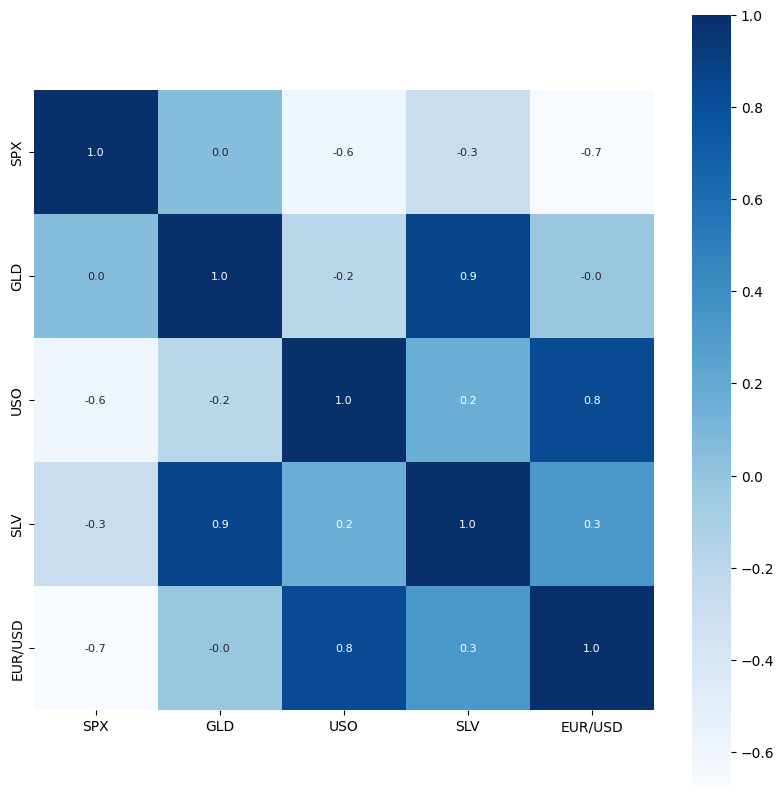

In [ ]:
data_visualisation(raw_data.drop(columns="Date", axis=1))

<ipython-input-100-0e6460179923>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data["GLD"],color="green")


<Axes: xlabel='GLD', ylabel='Density'>

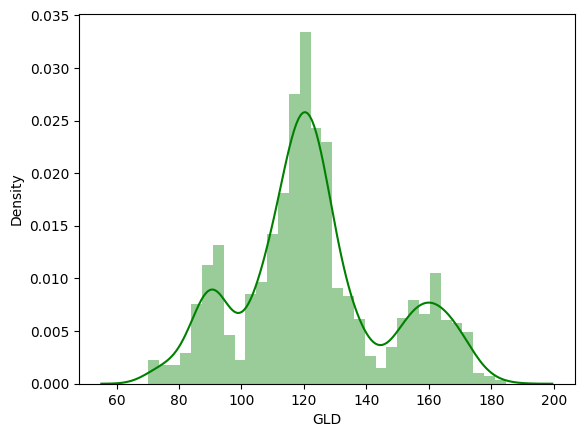

In [ ]:
sns.distplot(raw_data["GLD"],color="green")

In [ ]:
X = raw_data.drop(columns=["Date","GLD"], axis=1)
y = raw_data["GLD"]
shape(X,y)

(2290, 4)
(2290,)


In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
shape(X_train, X_test,y_train, y_test)

(1832, 4)
(458, 4)
(1832,)
(458,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
gold_model = RandomForestRegressor(n_estimators = 100)

In [ ]:
gold_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
model_result(gold_model, X_train, y_train, X_test, y_test, classify=False)

RandomForestRegressor() training evaluation:
r2 error: 0.99850
Absolute error: 0.47750
___________________________
RandomForestRegressor() testing evaluation:
r2 error: 0.99010
Absolute error: 1.24225


PROJECT 9 Heart disease

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Datasets/heart_disease_data.csv")
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data_investigation(raw_data,column=True, column_name="target")

Shape of data: (303, 14)
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
st

In [ ]:
X = raw_data.drop(columns="target", axis=1)
y = raw_data["target"]
shape(X,y)

(303, 13)
(303,)


In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.1, stratify = y, random_state=42)
shape(X_train, X_test,y_train, y_test)

(272, 13)
(31, 13)
(272,)
(31,)


In [ ]:
health_model = LogisticRegression()
health_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model_result(health_model, X_train, y_train, X_test, y_test)

LogisticRegression() training accuracy: 85.66176470588235%
LogisticRegression() evaluation accuracy: 77.41935483870968%


In [ ]:
filename= "heart_model.sav"
pickle.dump(health_model, open(filename,'wb'))

PROJECT 10 Credit card fraud detection

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Datasets/credit card.csv")
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data_investigation(raw_data, column=True, column_name="Class")

Shape of data: (284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.38024

In [ ]:
raw_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
real = raw_data[raw_data.Class == 0]
fraud = raw_data[raw_data.Class ==1]

In [ ]:
real = real.sample(n=492)

In [ ]:
final_data = pd.concat([real, fraud], axis=0)
data_investigation(final_data, column=True, column_name="Class")

Shape of data: (984, 31)
                Time          V1          V2          V3          V4  \
count     984.000000  984.000000  984.000000  984.000000  984.000000   
mean    89038.037602   -2.371102    1.842493   -3.521878    2.240181   
std     48901.722232    5.521414    3.685443    6.215068    3.228567   
min       181.000000  -30.552380  -20.283958  -31.103685   -4.786552   
25%     45874.000000   -2.788129   -0.099234   -5.120349   -0.155242   
50%     83860.500000   -0.776324    0.984316   -1.369045    1.307692   
75%    137429.250000    0.948649    2.791569    0.336194    4.222287   
max    171649.000000    2.314784   22.057729    3.146319   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  984.000000  984.000000  984.000000  984.000000  984.000000  ...   
mean    -1.528317   -0.707674   -2.779698    0.314520   -1.306374  ...   
std      4.215068    1.761833    5.841361    4.866298    2.311676  ...   
min    -22.105532   -6.406267 

In [ ]:
X = final_data.drop(columns="Class", axis=1)
y = final_data["Class"]

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
shape(X_train, X_test,y_train, y_test)

(787, 30)
(197, 30)
(787,)
(197,)


In [ ]:
credit_model = LogisticRegression()
credit_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model_result(credit_model, X_train, y_train, X_test, y_test)

LogisticRegression() training accuracy: 91.10546378653113%
LogisticRegression() evaluation accuracy: 92.89340101522842%


PROJECT 11 Health insurance prediction

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Datasets/insurance.csv")
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data_investigation(raw_data)

Shape of data: (1338, 7)
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
_________________________________
No. if missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
raw_data.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
raw_data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
raw_data.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
raw_data.replace({"sex": {"male":0, "female":1}, "smoker" : {"yes" : 1, "no" : 0}, "region" : {"southeast" : 0, "southwest" : 1, "northwest" : 2, "northeast" :  3}}, inplace=True)

In [ ]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [ ]:
X = raw_data.drop(columns="charges", axis=1)
y = raw_data.charges
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
shape(X_train, X_test,y_train, y_test)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [ ]:
healthModel = LinearRegression()
healthModel.fit(X_train, y_train)

LinearRegression()

In [ ]:
model_result(healthModel, X_train, y_train, X_test, y_test, classify=False)

LinearRegression() training evaluation:
r2 error: 0.65151
Absolute error: 4210.35747
___________________________
LinearRegression() testing evaluation:
r2 error: 0.70852
Absolute error: 4174.04788


PROJECT 12 Grocery Sales

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Datasets/Train (1).csv")
raw_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data_investigation(raw_data)

Shape of data: (8523, 12)
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
___________________

In [ ]:
raw_data["Item_Weight"].fillna(raw_data["Item_Weight"].mean(), inplace=True)

In [ ]:
raw_data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
raw_data.replace({"Item_Fat_Content": {"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"}}, inplace=True)
raw_data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
mode_of_outlet_size = raw_data.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0]))
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
missing_values=raw_data.Outlet_Size.isnull()

In [ ]:
raw_data.loc[missing_values, "Outlet_Size"] = raw_data.loc[missing_values, "Outlet_Type"].apply(lambda x: mode_of_outlet_size[x])

In [ ]:
raw_data.Outlet_Size.value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [ ]:
encode = LabelEncoder()
raw_data["Item_Fat_Content"]=encode.fit_transform(raw_data["Item_Fat_Content"])
raw_data["Outlet_Type"]=encode.fit_transform(raw_data["Outlet_Type"])
raw_data["Outlet_Location_Type"]=encode.fit_transform(raw_data["Outlet_Location_Type"])
raw_data["Outlet_Size"]=encode.fit_transform(raw_data["Outlet_Size"])
raw_data["Item_Type"]=encode.fit_transform(raw_data["Item_Type"])

X = raw_data.drop(columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"], axis=1)
y = raw_data.Item_Outlet_Sales

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
shape(X_train, X_test,y_train, y_test)

(6818, 9)
(1705, 9)
(6818,)
(1705,)


In [ ]:
sales_model = XGBRegressor()
sales_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_result(sales_model, X_train, y_train, X_test, y_test, classify=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) training evaluation:
r2 error: 0.82143
Absolute error: 454.41123
___________________________
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, devi

PROJECT 13 k-means clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Datasets/Mall_Customers.csv")
raw_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data_investigation(raw_data)

Shape of data: (200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
_________________________________
No. if missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
X = raw_data.iloc[:, 3:5].values

In [ ]:
wcss =[]
for i in range(1,11):
    Kmeans = KMeans(n_clusters = i, init="k-means++", random_state=42)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

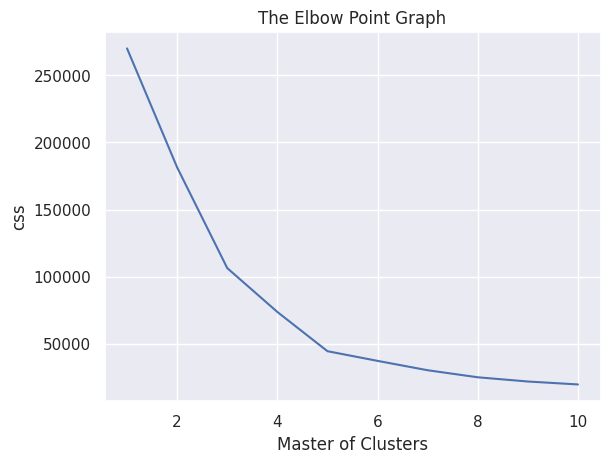

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title( "The Elbow Point Graph")
plt.xlabel("Master of Clusters")
plt.ylabel("css")
plt.show()

In [ ]:
cluster_model=KMeans(n_clusters=5, init="k-means++")
y=cluster_model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


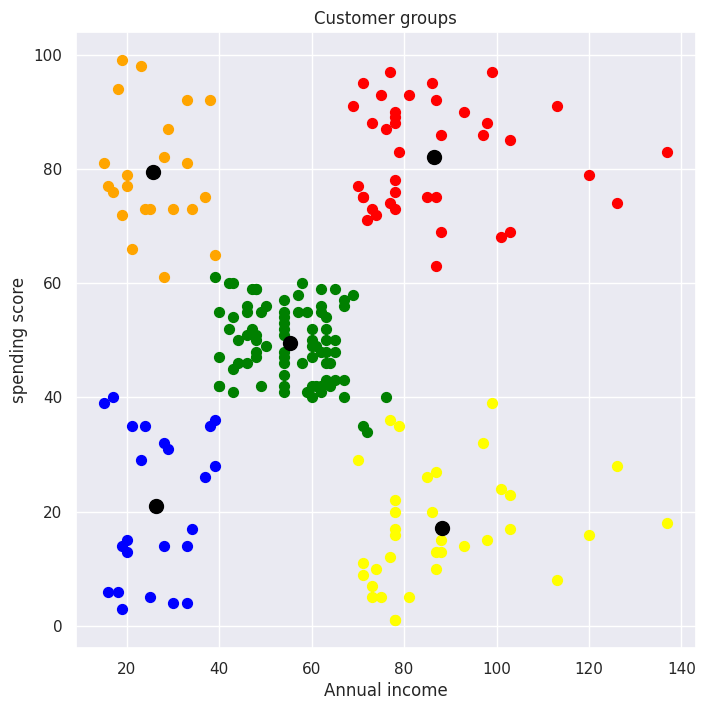

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c="green", label="cluster 1")
plt.scatter(X[y==1,0], X[y==1,1], s=50, c="blue", label="cluster 2")
plt.scatter(X[y==2,0], X[y==2,1], s=50, c="red", label="cluster 3")
plt.scatter(X[y==3,0], X[y==3,1], s=50, c="yellow", label="cluster 4")
plt.scatter(X[y==4,0], X[y==4,1], s=50, c="orange", label="cluster 5")

plt.scatter(cluster_model.cluster_centers_[:,0], cluster_model.cluster_centers_[:,1], s=100, c="black", label="centroids")

plt.title("Customer groups")
plt.xlabel("Annual income")
plt.ylabel("spending score")
plt.show()

PROJECT 14

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Datasets/parkinsons.data")
raw_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
data_investigation(raw_data, column=True, column_name="status")

Shape of data: (195, 24)
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.00954

In [ ]:
X=raw_data.drop(columns=["status", "name"], axis=1)
y=raw_data.status
shape(X,y)

(195, 22)
(195,)


In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
shape(X_train, X_test,y_train, y_test)

(175, 22)
(20, 22)
(175,)
(20,)


In [ ]:
scalar=StandardScaler()
scalar.fit(X_train)
scalar.transform(X_train)

array([[ 6.50789877e-01,  9.17699100e-04, -8.79937839e-01, ...,
        -9.87016577e-01, -5.17214784e-01,  1.28690856e-01],
       [ 1.14490318e+00,  4.79352442e-01,  1.06822396e+00, ...,
        -4.55198424e-02,  5.15206537e-01, -4.82158966e-01],
       [-3.52482067e-01, -4.04111636e-01, -1.15883943e+00, ...,
         2.95700368e-02, -4.06871675e-02,  2.44748052e-01],
       ...,
       [-1.61562620e-01, -3.47633442e-01,  5.66884243e-01, ...,
        -1.64510413e+00, -8.08206448e-02, -1.89639641e-01],
       [-1.64667980e-01, -4.45178810e-01,  4.00496952e-01, ...,
         1.98531300e-01,  1.20444903e+00, -1.21295335e-01],
       [-3.79371113e-01,  4.21803562e+00, -1.17864635e+00, ...,
         5.57126735e-01,  8.08704246e-01,  2.63880277e+00]])

In [ ]:
scalar.transform(X_test)

array([[-1.02896905e+00, -7.63286959e-01, -3.08930037e-01,
        -2.87018446e-01, -9.24914465e-02, -2.93608018e-01,
        -1.88841976e-01, -2.92615466e-01,  1.38354161e+00,
         1.16598972e+00,  1.45514920e+00,  1.39852711e+00,
         1.16957206e+00,  1.45547782e+00,  3.20573915e-02,
        -9.94270576e-01,  1.40607001e+00, -3.42137155e-01,
         9.64453932e-02,  9.83270533e-01,  1.11459186e-01,
         5.89667421e-02],
       [-2.59874942e-01,  1.64800162e+00, -7.97936277e-01,
        -1.43980340e-01, -9.24914465e-02, -3.81062969e-01,
        -1.81897068e-01, -3.82230033e-01, -4.81012225e-01,
        -4.55658084e-01, -5.77771292e-01, -4.84621556e-01,
        -1.95012875e-01, -5.77464047e-01, -1.51894127e-01,
         8.78520892e-02,  6.98507503e-01, -1.37591745e+00,
         2.75506778e-01,  1.85146918e-01, -2.85722874e-01,
         1.57228793e-01],
       [-8.93416488e-01, -7.55272795e-01, -5.02437218e-01,
         6.06436157e-02,  1.85618573e-01,  8.86025079e-02,
    

In [ ]:
parkinson_model=svm.SVC(kernel="linear")
parkinson_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
model_result(parkinson_model, X_train, y_train, X_test, y_test, classify=True)

SVC(kernel='linear') training accuracy: 86.85714285714286%
SVC(kernel='linear') evaluation accuracy: 90.0%


In [ ]:
filename= "parkinson_model.sav"
pickle.dump(parkinson_model, open(filename,'wb'))

PROJECT 15 Titanic

In [ ]:
raw_data=pd.read_csv("/content/drive/MyDrive/Datasets/train (2).csv")
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_investigation(raw_data, column=True, column_name="Survived")

Shape of data: (891, 12)
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
_________________________________
Survived
0    549
1   

In [ ]:
raw_data=raw_data.drop(columns="Cabin", axis=1)

In [ ]:
raw_data["Age"].fillna(raw_data["Age"].mean(), inplace=True)
raw_data["Embarked"].fillna(raw_data["Embarked"].mode()[0],inplace=True)
data_investigation(raw_data)

Shape of data: (891, 11)
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
_________________________________
No. if missing values:

In [ ]:
raw_data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
raw_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
raw_data.replace({"Embarked": {"S":0,"C":1,"Q":2},"Sex":{"male":0,"female":1}},inplace=True)
X=raw_data.drop(columns=["PassengerId","Name","Ticket","Survived"],axis=1)
y=raw_data.Survived

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
shape(X_train, X_test,y_train, y_test)

(801, 7)
(90, 7)
(801,)
(90,)


In [ ]:
titanic_model=LogisticRegression()
titanic_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model_result(titanic_model, X_train, y_train, X_test, y_test, classify=True)

LogisticRegression() training accuracy: 79.40074906367042%
LogisticRegression() evaluation accuracy: 85.55555555555556%


PROJECT 16 Calories dataset

In [ ]:
features=pd.read_csv("/content/drive/MyDrive/Datasets/Calories dataset /exercise.csv")

In [ ]:
labels=pd.read_csv("/content/drive/MyDrive/Datasets/Calories dataset /calories.csv")

In [ ]:
raw_data=pd.concat([features, labels["Calories"]],axis=1)
raw_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
data_investigation(raw_data)

Shape of data: (15000, 9)
            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88

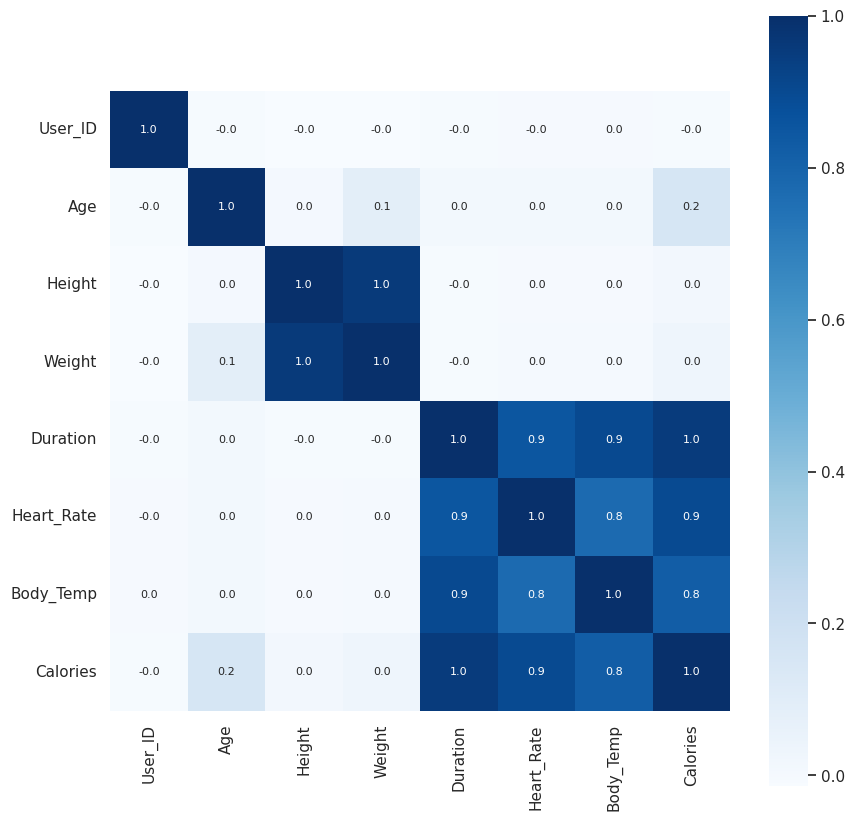

In [ ]:
data_visualisation(raw_data.drop(columns="Gender",axis=1))

In [ ]:
raw_data.replace({"Gender":{"male":0,"female":1}},inplace=True)
raw_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
X=raw_data.drop(columns=["User_ID","Calories"],axis=1)
y=raw_data.Calories

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
shape(X_train, X_test,y_train, y_test)

(13500, 7)
(1500, 7)
(13500,)
(1500,)


In [ ]:
calories_model=XGBRegressor()
calories_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_result(calories_model, X_train, y_train, X_test, y_test, classify=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) training evaluation:
r2 error: 0.99956
Absolute error: 0.96039
___________________________
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device

PROJECT 17 Spam/Ham

In [ ]:
raw_data=pd.read_csv("/content/drive/MyDrive/Datasets/mail_data.csv")
raw_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
raw_data=raw_data.fillna("")

In [ ]:
raw_data.replace({"Category":{"spam":0,"ham":1}},inplace=True)
X=raw_data.Message
y=raw_data.Category
shape(X,y)

(5572,)
(5572,)


In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
shape(X_train, X_test,y_train, y_test)

(5014,)
(558,)
(5014,)
(558,)


In [ ]:
features_extraction=TfidfVectorizer(min_df=1, stop_words="english",lowercase=True)
features_extraction.fit(X_train)
X_trainf=features_extraction.transform(X_train)
X_testf=features_extraction.transform(X_test)

In [ ]:
mail_model=LogisticRegression()
mail_model.fit(X_trainf,y_train)

LogisticRegression()

In [ ]:
model_result(mail_model, X_trainf, y_train, X_testf, y_test, classify=True)

LogisticRegression() training accuracy: 97.0482648583965%
LogisticRegression() evaluation accuracy: 96.23655913978494%


In [ ]:
def spam_mail(input):
    input=[input]
    input=features_extraction.transform(input)
    pred=mail_model.predict(input)
    if pred==1:
       print("This mail is Ham")
    else:
       print("This mail is Spam")

In [ ]:
input="Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!"
spam_mail(input)

This mail is Spam


PROJECT 18

In [ ]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
!git remote add origin https://github.com/prynshus/Machine-learning-.git

error: remote origin already exists.


In [ ]:
!git branch main

fatal: A branch named 'main' already exists.


In [ ]:
!git config --global user.name "prynshus"
!git config --global user.email "priyanshusengupta055@gmail.com"

In [ ]:
!git commit --allow-empty -m "Initial commit"

[main aeff0d4] Initial commit


In [ ]:
!git branch -M main

In [ ]:
!git branch

* main


In [26]:

!git branch -M main
!git push -u origin main

fatal: could not read Username for 'https://github.com': No such device or address
